<a href="https://colab.research.google.com/github/akhileshchoudary/bone-fracture-classification/blob/main/Bone_Break_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# I mount my Google Drive to access the dataset stored in the cloud.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# I define the path to the dataset directory for easy reference throughout the code.
!ls "/content/drive/My Drive/Bone Break Classification"

'Avulsion fracture'	'Hairline Fracture'	 'Pathological fracture'
'Comminuted fracture'	'Impacted fracture'	 'Spiral Fracture'
'Fracture Dislocation'	'Longitudinal fracture'
'Greenstick fracture'	'Oblique fracture'


In [3]:
data_dir = "/content/drive/My Drive/Bone Break Classification"

#### Importing Libraries

- I import the necessary libraries for data processing, visualization, and building the machine learning model.
- 'os' and 'numpy' are for file handling and numerical operations.
- 'matplotlib.pyplot' is for plotting images.
- 'tensorflow' and 'keras' provide tools for building and training the neural network.
- 'pathlib' is used for handling file paths.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras import (
    backend as K,
    losses,
    optimizers,
    layers,
    models,
    utils,
    callbacks
)

from pathlib import Path

#### Load Training and Validation Data
- I create training and validation datasets from the image directory using TensorFlow's image_dataset_from_directory.
- The dataset is split with 90% for training and 10% for validation.
- Images are resized to 256x256 pixels, and the batch size is set to 64.
- Labels are inferred from folder names, and the seed ensures reproducibility.

In [5]:
train_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40
)

#load the test data
validation_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42
)

Found 1101 files belonging to 10 classes.
Using 991 files for training.
Found 1101 files belonging to 10 classes.
Using 110 files for validation.


- The output indicates that 1101 files are found across 10 classes.
- Training dataset: 991 files are used.
- Validation dataset: 110 files are used.
- This confirms that the data is successfully loaded and split.

In [6]:
# Inspect the class names from the dataset
class_names = train_data.class_names
print("Class names:", class_names)

Class names: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [7]:
# I define a preprocessing function to normalize image pixel values to the range [0, 1].
# This is done by casting images to float32 and dividing by 255.

def preprocess(img):
    img = tf.cast(img, "float32") / 255.0
    return img

# Applying the preprocessing function to both training and validation datasets.

train_dataset = train_data.map(lambda x, y: (preprocess(x), y))
val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))

In [8]:
# I extract images and labels from the training dataset into NumPy arrays.
# This is useful for further processing or visualization.

x_train = []
y_train = []

# Iterating through the training dataset to collect images and labels.
for images, labels in train_dataset:
    #append train data to x_train
    x_train.append(images.numpy())

    #append labels to y_train
    y_train.append(labels.numpy())

# concatenate all the batches to get the full list
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [9]:
# get val data and labels

x_val = []
y_val = []

for images, labels in val_dataset:
    #append train data to x_train
    x_val.append(images.numpy())

    #append labels to y_train
    y_val.append(labels.numpy())

# concatenate all the batches to get the full list
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [10]:
# defining a function to extract a single batch from a dataset. This is useful for sampling and visualizing a subset of the data.

def sample_batch(data):
    batch = data.take(1).get_single_element()
    if isinstance(batch, tuple):
        batch = batch[0]
    return batch.numpy()

In [11]:
# created a dictionary to map integer labels to their corresponding class names. This will be used for labeling images during visualization.
class_names_dict = {
    0: 'Avulsion fracture',
    1: 'Comminuted fracture',
    2: 'Fracture Dislocation',
    3: 'Greenstick fracture',
    4: 'Hairline Fracture',
    5: 'Impacted fracture',
    6: 'Longitudinal fracture',
    7: 'Oblique fracture',
    8: 'Pathological fracture',
    9: 'Spiral Fracture'
}

In [12]:
# function to display images

def display(images, n=10, size=(15,5), cmap="gray_r", as_type="float32"):
    indices = np.random.choice(len(images), n)

    num_images_per_row = 4

    num_rows = (n + num_images_per_row - 1) // num_images_per_row

    # Set up the subplots
    fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=size)

    #plt.figure(figsize=size)
    for i, index in enumerate(indices):
        #plt.subplot(1, n, i+1)

        label_index = y_train[index]

        # Convert integer label to class name
        class_name = class_names_dict.get(label_index, f'Unknown Class {label_index}')

          # Calculate the position of the subplot in the grid
        row = i // num_images_per_row
        col = i % num_images_per_row

        axes[row, col].imshow(images[index].astype(as_type), cmap=cmap)
        axes[row, col].set_title(f'Class: {label_index}')
        axes[row, col].axis('off')

    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    plt.show()

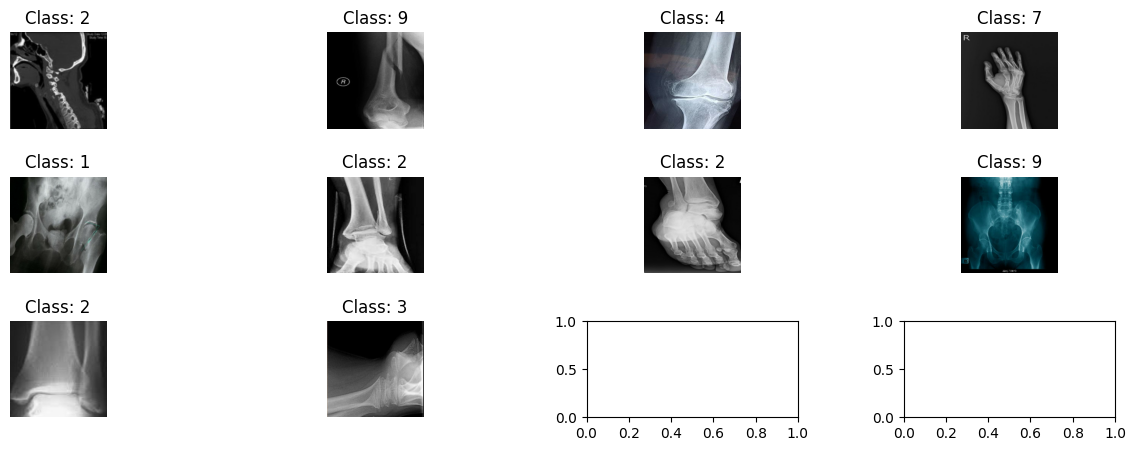

In [13]:
# display sample train images

sample_images = x_train[:100]

display(sample_images)

In [14]:
# view tensor shape

x_train.shape

(991, 256, 256, 3)

- I one-hot encode the training and validation labels to prepare them for multi-class classification, converting integer labels into binary vectors of length 10 (e.g., label 2 becomes [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]). This results in y_train (991, 10) and y_val (110, 10), ready for the neural network.

In [15]:
NUM_CLASSES = len(class_names)

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_val = utils.to_categorical(y_val, NUM_CLASSES)

In [16]:
# I define a neural network model for classifying bone fractures, starting with an input layer for 256x256 RGB images.
# then flatten the input to a vector and pass it through a series of dense layers (300, 250, 200, 150, 100 units) with LeakyReLU activations and batch normalization for improved training stability. The output layer has 10 units with softmax activation for multi-class classification. Finally, I create and summarize the model to inspect its architecture.

input_layer = layers.Input(shape=(256, 256, 3), name="input_layer")

# Flatten to Vector before inputing in Dense Layer

x = layers.Flatten()(input_layer)

x = layers.Dense(units=300)(x)
x = layers.LeakyReLU(0.2)(x)

x = layers.Dense(units=250)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)

x = layers.Dense(units=200)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)

x = layers.Dense(units=150)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)

x = layers.Dense(units=100)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)

output_layer = layers.Dense(units=10, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │    58,982,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 250)            │        75,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 250)            │         1,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        50,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 150)            │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,157,210 (225.67 MB)

 Trainable params: 59,155,810 (225.66 MB)

 Non-trainable params: 1,400 (5.47 KB)

- compiling and training the neural network model for bone fracture classification. I use the Adam optimizer with a learning rate of 0.0005 and categorical crossentropy as the loss function, suitable for multi-class classification, while tracking accuracy. I train the model on the training data (x_train, y_train) for 16 epochs with a batch size of 32 and shuffling enabled to ensure randomized batch sampling, optimizing the model to learn patterns in the fracture images.


In [17]:
# compile
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=16,
    shuffle=True
)

Epoch 1/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1379 - loss: 2.5540
Epoch 2/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2890 - loss: 2.0847
Epoch 3/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.2845 - loss: 1.9775
Epoch 4/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3875 - loss: 1.8258
Epoch 5/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4096 - loss: 1.7850
Epoch 6/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.4314 - loss: 1.6868
Epoch 7/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4809 - loss: 1.5934
Epoch 8/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5083 - loss: 1.4947
Epoch 9/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5290 - loss: 1.4118
Epoch 10/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5974 - loss: 1.2698
Epoch 11/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6164 - loss: 1.2131
Epoch 12/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6241 - lo

In [19]:
# Evaluate Model

model.evaluate(x_val, y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.5432 - loss: 1.2998


[1.371228575706482, 0.5272727012634277]

In [21]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_val, axis=-1)]

In [22]:
def display_preds_act(n=10, figsize=(15,3)):

    indices = np.random.choice(range(len(y_val)), n)

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)

    for i, idx in enumerate(indices):
        img = x_val[idx]
        ax = fig.add_subplot(1, n, i + 1)
        ax.axis("off")
        ax.text(0.5, -0.35, "pred = " + str(preds_single[idx].split(" ")[0][:4]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.text(0.5, -0.7, "act = " + str(actual_single[idx].split(" ")[0][:4]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.imshow(img)

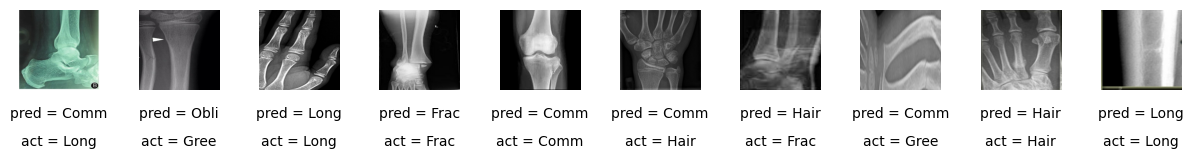

In [23]:
# predicstions with MLP
display_preds_act(n=10)

- defining a convolutional neural network (CNN) model for bone fracture classification, starting with an input layer for 256x256 RGB images. I use four Conv2D layers with increasing filters (32, 64, 128, 256), each with a 3x3 kernel, stride of 2, and same padding, followed by batch normalization, LeakyReLU activation, and 20% dropout to prevent overfitting. After flattening the output, I add a dense layer with 100 units, batch normalization, LeakyReLU, and dropout, followed by a 10-unit output layer with softmax activation for multi-class classification. Finally, I create and summarize the model to review its architecture

In [24]:
input_layer = layers.Input(shape=(256,256, 3))

x = layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=2,
    padding="same"
)(input_layer)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    64,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    128,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    256,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Flatten()(x)

x = layers.Dense(units=100)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

output_layer = layers.Dense(units=10, activation="softmax")(x)

model2 = models.Model(input_layer, output_layer)

model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │     6,553,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,945,446 (26.49 MB)

 Trainable params: 6,944,286 (26.49 MB)

 Non-trainable params: 1,160 (4.53 KB)

In [25]:
# I compile model2 for bone fracture classification using Adam optimizer (learning rate 0.0005), categorical crossentropy loss for multi-class classification, and accuracy metric to monitor training performance.
opt = optimizers.Adam(learning_rate=0.0005)
model2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


In [26]:
from keras import callbacks

- I import ModelCheckpoint and TensorBoard callbacks from Keras to enhance model training. I set up a ModelCheckpoint callback to save the best model (based on minimum loss) after each epoch to './checkpoint.keras', including the full model. I also configure a TensorBoard callback to log training metrics to './logs' for visualization and analysis.

In [27]:
from keras.callbacks import ModelCheckpoint, TensorBoard

# Checkpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath="./checkpoint.keras",
    save_weights_only=False,
    save_freq="epoch",
    monitor="loss",
    mode="min",
    save_best_only=True,
    verbose=0
)

# TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs")

In [28]:
# # I train model2 for 10 epochs with a batch size of 32, shuffling the training data (x_train, y_train).
# I use validation data (x_val, y_val) to track performance and apply ModelCheckpoint and TensorBoard callbacks to save the best model and log metrics.
history = model2.fit(
    x_train, y_train,
    shuffle=True,
    batch_size=32,
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=[
        model_checkpoint_callback,
        tensorboard_callback
    ]
)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1505 - loss: 2.7672 - val_accuracy: 0.1455 - val_loss: 2.3740
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.2959 - loss: 2.0063 - val_accuracy: 0.2091 - val_loss: 2.0708
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5107 - loss: 1.5084 - val_accuracy: 0.6364 - val_loss: 1.1689
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7223 - loss: 0.9589 - val_accuracy: 0.8364 - val_loss: 0.7718
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8763 - loss: 0.5636 - val_accuracy: 0.8182 - val_loss: 0.6291
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9365 - loss: 0.3722 - val_accuracy: 0.8818 - val_loss: 0.4780
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9802 - loss: 0.2130 - val_accuracy: 0.8636 - val_loss: 0.5229
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9870 - loss: 0.1571 - val_accuracy: 0.8727 - val_loss:

In [29]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["accuracy"]

In [30]:
model2.evaluate(x_val, y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 633ms/step - accuracy: 0.8934 - loss: 0.3964


[0.47863373160362244, 0.8818181753158569]

#### Performance Metrics:
- The accuracy of 89.34% shows that the CNN performs well but isn’t perfect, as about 11% of validation images are misclassified.
- The loss of 0.3964 indicates that while the model’s predictions are generally close to the true labels, there’s still some error to minimize.
#### Implications:
- An accuracy below 90% suggests that the model might struggle with certain fracture types, possibly due to class imbalance, insufficient training, or overfitting.
- The low loss is encouraging, but further reduction could lead to better performance.

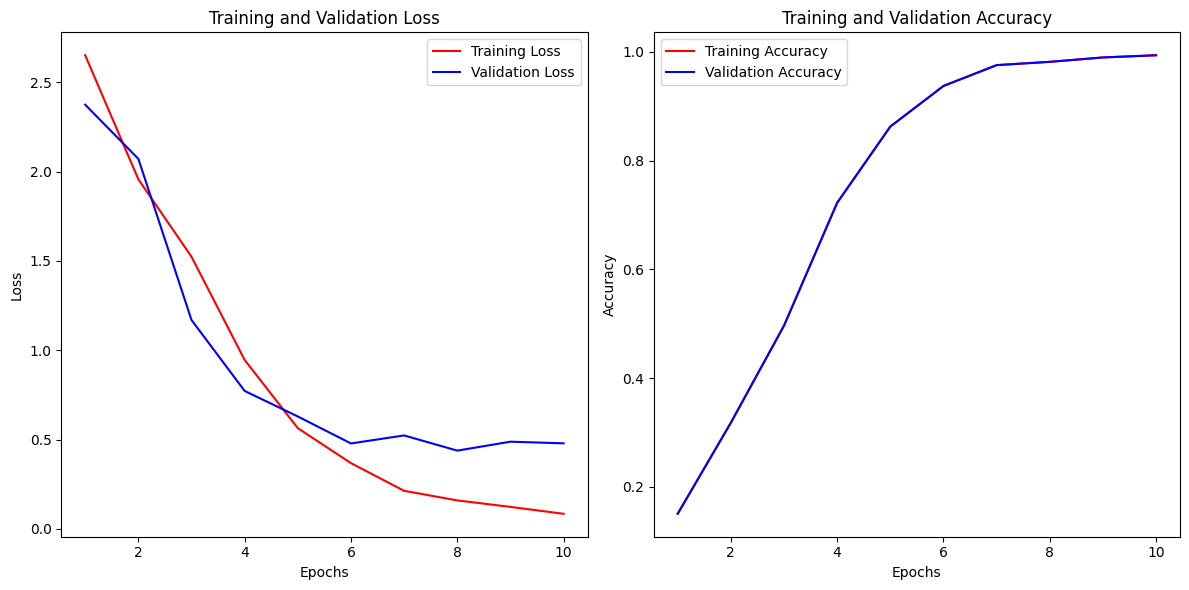

In [31]:
# plotting learning curve

epochs= range(1,11)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'r-', label="Training Loss")
plt.plot(epochs, val_loss, 'b-', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracy, 'r-', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b-', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

- Generating predictions on the validation dataset (x_val) using model2, taking the class with the highest probability for each image (argmax). I also extract the actual labels from y_val for comparison.
- Then, displaying 10 images with their predicted (pred) and actual (act) labels to visually assess the model's performance, completing the prediction in 4 steps as expected for 110 samples with a batch size of 32.

In [33]:
#predictions

preds = model2.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step


In [34]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_val, axis=-1)]

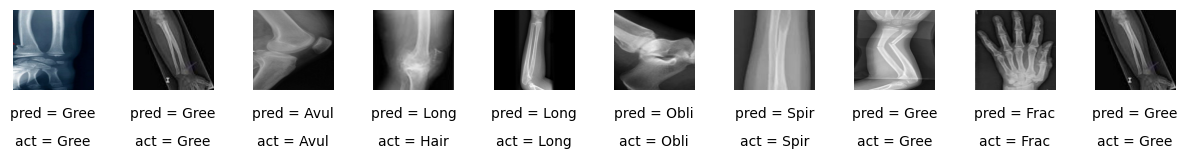

In [35]:
#Predictions

display_preds_act()